<a href="https://colab.research.google.com/github/mariachurches/AprendizajeSupervisado/blob/main/Enunciado_C1_P2/Actividad_C1_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convocatoria 1 - Proyecto 2

### Ejercicio 1 (4 puntos)
Utilizar el conjunto de datos "dataset_1.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

In [211]:
#Importamos las librerias necesarias y cargamos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.covariance import EllipticEnvelope

data = np.load("/content/dataset_1.npy")
X_data = data[:, : -1]
y_data = data[:, -1]

#### 1.a) Imputación de valores ausentes (2 puntos)

- En aquellas instancias (filas) que contengan UN ÚNICO VALOR NaN en alguno de sus atributos (columnas), se imputará dicho valor.
 * Si el atributo corresponde a una variable discreta, se imputará el valor utilizando la moda de dicho atributo. 
 * Si el atributo corresponde a una variable continua, se imputará el valor utilizando la media de dicho atributo. 
- Aquellas instancias (filas) que contengan MÁS DE UN VALOR NaN en sus atributos, deberán ser eliminadas por completo. 

Los outputs deberán ser: 
- Una matriz "X" de dimensiones M x N, donde M será el número de instancias y N, el de atributos.
- Un vector "y" de dimensiones M. 

In [212]:
print("Antes de la imputación de valores ausentes había que " +  str(np.isnan(data).any(axis=1).sum()) + " filas con valores ausentes")

#Primero borramos aquellas instancias que tienen más de un elemento nan
X_data = X_data[~np.isnan(X_data).all(axis=1)]

#Después borramos los NaN restantes como nos indica el enunciado
data_discreta = X_data[:,:4]
data_continua = X_data[:,5:]

imp_media = SimpleImputer(strategy='mean') # Utilizamos la estrategia de la media
imp_moda = SimpleImputer(strategy='most_frequent') # Utilizamos la estrategia de la media

data_discreta_fit = imp_media.fit_transform(data_discreta)
data_continua_fit = imp_moda.fit_transform(data_continua)

X_data[:,:4] = data_discreta_fit
X_data[:,5:] = data_continua_fit

print("Después de la imputación de valores ausentes hay que " +  str(np.isnan(X_data).any(axis=1).sum()) + " filas con valores ausentes")

Antes de la imputación de valores ausentes había que 8 filas con valores ausentes
Después de la imputación de valores ausentes hay que 0 filas con valores ausentes


#### 1.b) Eliminación de valores outliers extremos (2 puntos)
- Aplicar el método de Elliptic Envelope fijando una semilla en 42
- Utilizar el diagrama de caja y bigotes para establecer los umbrales de decisión
- Plotear el diagrama (box and whiskers) obtenido a partir de las puntuaciones calculadas con el método Elliptic Envelope
- Eliminar las instancias que contengan valores outliers extremos

Los outputs deberán ser: 
- Una matriz "X" de dimensiones M' x N, donde M' será el nuevo número de instancias y N, el de atributos.
- Un vector "y" de dimensiones M'. 

limite inferior:  76.2155123582446
limite superior:  127.15503403893902


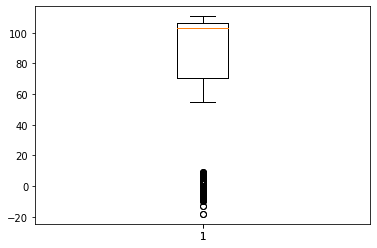

Posición de outliers en el extremo inferior:  [348 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387
 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405
 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423
 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441
 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459
 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477
 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494]
Posición de outliers en el extremo superior:  []
[0. 1.] [370 125]
Número de instancias normales:  370
Número de instancias atípicas:  125


In [213]:
outlier_method = EllipticEnvelope(random_state=42).fit(X_data)
# Obtenemos unos valores de puntuación a nivel de instancia para determinar después las que corresponden con valores atípicos
scores_pred = outlier_method.decision_function(X_data)

Q1 = stats.scoreatpercentile(scores_pred, 30)
Q3 = stats.scoreatpercentile(scores_pred, 70)
RIC = Q3 - Q1
li = Q1 - 3*RIC #xmin
ls = Q3 + 3*RIC #xmax

print('limite inferior: ', li)
print('limite superior: ', ls)

import matplotlib.pyplot as plt
prop = plt.boxplot(scores_pred)
plt.boxplot(scores_pred)
plt.show()

# Estimación de outliers. Encontramos la posición de los outliers dentro de nuestros conjunto de datos
pos_i = np.where(scores_pred<li)
pos_s = np.where(scores_pred>ls)
print('Posición de outliers en el extremo inferior: ', pos_i[0])
print('Posición de outliers en el extremo superior: ', pos_s[0])


mask_outliers = np.zeros(np.shape(scores_pred))
mask_outliers[pos_i] = 1
mask_outliers[pos_s] = 1

valores, ocurrencias = np.unique(mask_outliers, return_counts=True)
print(valores, ocurrencias)
print('Número de instancias normales: ', ocurrencias[0])
print('Número de instancias atípicas: ', ocurrencias[1])

for i in range(len(pos_i[0])):
  X_data = np.delete(X_data,(i), axis = 0)
  y_data = np.delete(y_data,(i), axis = 0)

for i in range(len(pos_s[0])):
  X_data = np.delete(X_data,(i), axis = 0)
  y_data = np.delete(y_data,(i), axis = 0)

### Ejercicio 2 (6 puntos)

Crear un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, MSE, RMSE, MAPE y R2 aplicando los regresores OLS y KNN en DOS datasets de regresión (a elegir). Nota: Al menos uno de los datasets deberá ser externo a la librería de scikit-learn.

Se debe llevar a cabo:
- Exploración de los datos y descripción del dataset
- Tratamiento de outliers y valores perdidos (si los hay)
- Partición externa de datos
- Estandarización de los datos
- Selección de atributos mediante métodos supervisados (solo uno)
- Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
- Modelado
- Predicción y evaluación sobre el conjunto de test (resultados cuantitativos y cualitativos)
- Breve discusión comparando los resultados obtenidos con cada método.

In [157]:
#Importamos las librerias necesarias no importadas en el ejercicio anterior
import math
from scipy import stats
from scipy.stats import kstest 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

1º Dataset:

In [158]:
#Exploración de los datos y descripción del dataset  
diabetes = load_diabetes()

print("Tabla de datos: %d instancias y %d atributos" % (diabetes.data.shape[0], diabetes.data.shape[1]))
print("Valores de la clase:", set(diabetes.target))

valores, ocurrencias = np.unique(diabetes.target, return_counts=True)
print(valores, ocurrencias)

Tabla de datos: 442 instancias y 10 atributos
Valores de la clase: {25.0, 31.0, 37.0, 39.0, 40.0, 42.0, 43.0, 44.0, 45.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 57.0, 58.0, 59.0, 60.0, 61.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 77.0, 78.0, 79.0, 80.0, 81.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 131.0, 132.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 158.0, 160.0, 161.0, 162.0, 163.0, 164.0, 166.0, 167.0, 168.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 189.0, 190.0, 191.0, 192.0, 195.0, 196.0, 197.0, 198.0, 199

limite inferior:  26.630758814623476
limite superior:  138.99194109673505


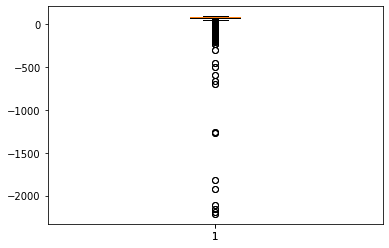

Posición de outliers en el extremo inferior:  [  9  23  29  38  72  96 110 114 115 117 125 149 161 167 168 169 172 177
 185 199 202 205 225 234 239 248 249 250 251 254 273 276 285 289 291 303
 316 321 322 323 324 325 336 346 350 353 354 366 368 371 382 390 394 403
 408 410 428]
Posición de outliers en el extremo superior:  []
[0. 1.] [385  57]
Número de instancias normales:  385
Número de instancias atípicas:  57


In [159]:
#Tratamiento de outliers y valores perdidos (si los hay)

outlier_method = EllipticEnvelope().fit(diabetes.data)
# Obtenemos unos valores de puntuación a nivel de instancia para determinar después las que corresponden con valores atípicos
scores_pred = outlier_method.decision_function(diabetes.data)

Q1 = stats.scoreatpercentile(scores_pred, 25)
Q3 = stats.scoreatpercentile(scores_pred, 75)
RIC = Q3 - Q1
li = Q1 - 3*RIC #xmin
ls = Q3 + 3*RIC #xmax

print('limite inferior: ', li)
print('limite superior: ', ls)

prop = plt.boxplot(scores_pred)
plt.boxplot(scores_pred)
plt.show()

pos_i = np.where(scores_pred<li)
pos_s = np.where(scores_pred>ls)
print('Posición de outliers en el extremo inferior: ', pos_i[0])
print('Posición de outliers en el extremo superior: ', pos_s[0])

mask_outliers = np.zeros(np.shape(scores_pred))
mask_outliers[pos_i] = 1
mask_outliers[pos_s] = 1

valores, ocurrencias = np.unique(mask_outliers, return_counts=True)
print(valores, ocurrencias)
print('Número de instancias normales: ', ocurrencias[0])
print('Número de instancias atípicas: ', ocurrencias[1])

for i in range(len(pos_i[0])):
  diabetes.data = np.delete(diabetes.data,(i), axis = 0)
  diabetes.target = np.delete(diabetes.target,(i), axis = 0)

for i in range(len(pos_s[0])):
  diabetes.data = np.delete(diabetes.data,(i), axis = 0)
  diabetes.target = np.delete(diabetes.target,(i), axis = 0)

In [160]:
#Partición externa de datos
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)
valores_test, ocur_test = np.unique(y_test, return_counts=True)
print('Test: ', 'clases:', valores_test, ' ocurrencias: ', ocur_test)

Test:  clases: [ 44.  47.  51.  53.  55.  59.  63.  64.  69.  72.  74.  75.  77.  80.
  83.  85.  86.  90.  91.  96.  97. 101. 103. 104. 109. 111. 113. 115.
 127. 128. 132. 136. 141. 142. 144. 153. 164. 168. 172. 183. 185. 191.
 192. 196. 198. 200. 216. 217. 220. 221. 225. 230. 253. 257. 258. 259.
 261. 263. 268. 272. 274. 275. 276. 281. 288. 297. 317. 332.]  ocurrencias:  [1 1 1 1 1 3 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [161]:
#Estandarización de los datos
estandarizador = StandardScaler()
estandarizador.fit(X_train)
mu = estandarizador.mean_
sigma = np.sqrt(estandarizador.var_)
X_train = estandarizador.transform(X_train)

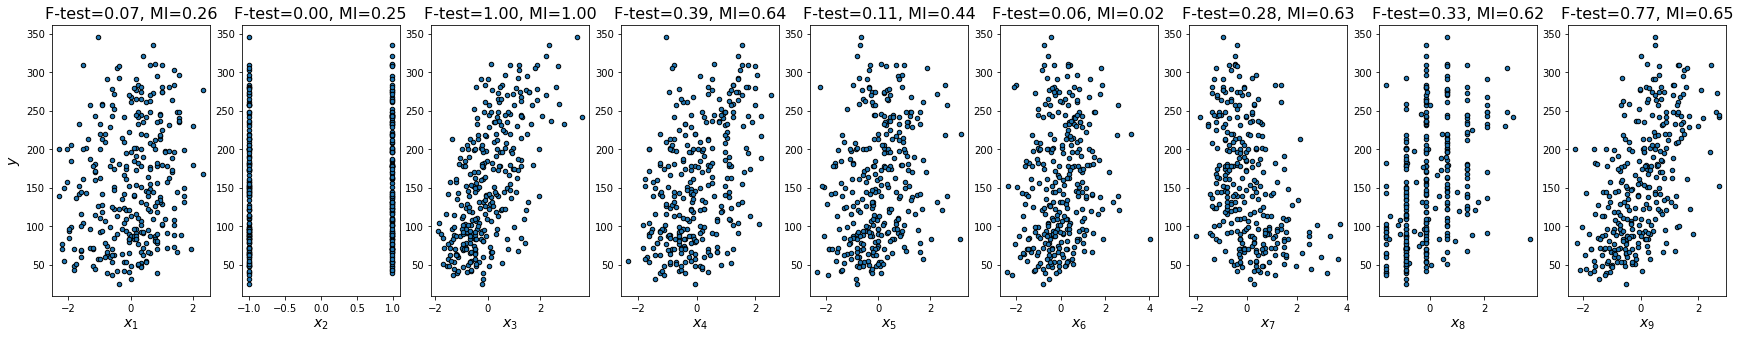

(308, 10)
(308, 9)


In [162]:
#Selección de atributos mediante métodos supervisados (solo uno)

f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train,y_train)
mi /= np.max(mi)

plt.figure(figsize=(30, 5))
for i in range(9):
    plt.subplot(1, 9, i + 1)
    plt.scatter(X_train[:, i], y_train, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i],
              mi[i]), fontsize=16)
plt.show()

print(X_train.shape)

for i in range(len(f_test)):
  j=0
  if f_test[i] + mi[i] < 0.2:
    X_train = np.delete(X_train,(i-j), axis = 1)
    X_test = np.delete(X_test,(i-j), axis = 1)
    j+=1

print(X_train.shape)

In [178]:
#Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
valores_train, ocur_train = np.unique(y_train, return_counts=True)
print('Entrenamiento: ', ' clases:', valores_train, '  ocurrencias:', ocur_train)

valores_val, ocur_val = np.unique(y_val, return_counts=True)
print('Entrenamiento: ', ' clases:', valores_val, '  ocurrencias:', ocur_val)

Entrenamiento:   clases: [ 2.33  4.57  4.78  4.83  4.9   6.27  6.28  6.81  6.88  6.9   7.75  7.84
  8.54  9.01  9.13  9.31  9.56  9.69  9.74 10.22 10.34 10.35 10.39 10.54
 10.73 10.76 11.39 11.47 11.48 11.58 11.65 11.96 12.18 12.25 12.37 12.45
 12.47 12.64 12.73 12.79 13.09 13.2  13.29 13.33 13.36 13.4  13.46 13.54
 13.71 13.82 14.14 14.2  14.4  14.5  14.54 14.64 14.8  15.03 15.04 15.34
 15.36 15.42 15.44 15.52 15.58 15.62 15.75 15.82 15.87 16.88 17.17 17.2
 17.24 17.28 17.34 17.37 17.44 17.54 17.57 17.58 18.02 18.13 18.28 18.29
 18.42 18.91 19.01 19.35 19.52 19.54 19.69 19.77 19.99 20.08 20.59 20.92
 20.97 21.02 21.16 21.29 21.5  21.54 21.75 21.82 21.86 21.92 21.95 22.32
 22.35 22.44 22.5  22.53 22.63 22.95 23.08 23.14 23.25 23.4  23.51 23.52
 23.64 23.69 23.74 23.79 23.85 24.   24.05 24.07 24.1  24.13 24.24 24.28
 24.29 24.39 24.44 24.48 24.58 24.66 24.9  24.99 25.02 25.1  25.12 25.18
 25.2  25.42 25.45 25.48 25.51 25.57 25.73 25.75 25.89 26.06 26.2  26.23
 26.31 26.74 26.77 26.85 26

In [179]:
#Modelado
n_neighbors=5
results=[]
best_result=[0,0]
best_n_neighbors=0
for i in range(X_train.shape[1]):
    n_neighbors=i+1
    KNN = KNeighborsRegressor(n_neighbors)
    results = cross_val_score(KNN, X_val, y_val, cv=KFold(n_splits=5, shuffle=True, random_state=42))
    if results.mean() > best_result[0]:
      best_result[0] = results.mean()
      best_result[1] = results.std()
      best_n_neighbors = i+1

print(' KNN :  Accuracy:  %0.4f +/- %0.4f with %i neighbors'% (best_result[0], best_result[1], best_n_neighbors))

 KNN :  Accuracy:  0.3370 +/- 0.4270 with 4 neighbors


In [180]:
#Predicción y evaluación sobre el conjunto de test (resultados cuantitativos y cualitativos)
OLS = LinearRegression()
KNN = KNeighborsRegressor(best_n_neighbors)

OLS_definitivo = OLS.fit(X_train, y_train)
ols_y_pred = OLS_definitivo.predict(X_test)

# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, ols_y_pred))
#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, ols_y_pred))
#MAPE
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, ols_y_pred))
#RMSE
print("Mean squeared error: %.2f" % math.sqrt(mean_squared_error(y_test, ols_y_pred)))
# R2
print("Coefficient of determination: %.2f" % r2_score(y_test, ols_y_pred))

KNN_definitivo = KNN.fit(X_train, y_train)
knn_y_pred = KNN_definitivo.predict(X_test)

# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, knn_y_pred))
#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, knn_y_pred))
#MAPE
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, knn_y_pred))
#RMSE
print("Mean squeared error: %.2f" % math.sqrt(mean_squared_error(y_test, knn_y_pred)))
# R2
print("Coefficient of determination: %.2f" % r2_score(y_test, knn_y_pred))

Mean squared error: 2645587.69
Mean absolute error: 1427.11
Mean absolute percentage error: 69.91
Mean squeared error: 1626.53
Coefficient of determination: -9804.52
Mean squared error: 737.02
Mean absolute error: 22.34
Mean absolute percentage error: 0.57
Mean squeared error: 27.15
Coefficient of determination: -1.73


Breve discusión comparando los resultados obtenidos con cada método.
Se ha podido comprobar como ninguno de los dos algoritmos nos ha ofrecido un gran rendimiento, aun asi se puede ver como el OLS ha dado mejores resultados que el KNN

Dataset 2

In [181]:
#Exploración de los datos y descripción del dataset  

dataFrame = pd.read_csv('/content/concrete_data.csv')
print(dataFrame.columns)
print()
print("---- Ejemplo de las 10 primeras instancias ---- \n")
print(dataFrame.head(10))

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

---- Ejemplo de las 10 primeras instancias ---- 

   Cement  Blast Furnace Slag  Fly Ash  ...  Fine Aggregate  Age  Strength
0   540.0                 0.0      0.0  ...           676.0   28     79.99
1   540.0                 0.0      0.0  ...           676.0   28     61.89
2   332.5               142.5      0.0  ...           594.0  270     40.27
3   332.5               142.5      0.0  ...           594.0  365     41.05
4   198.6               132.4      0.0  ...           825.5  360     44.30
5   266.0               114.0      0.0  ...           670.0   90     47.03
6   380.0                95.0      0.0  ...           594.0  365     43.70
7   380.0                95.0      0.0  ...           594.0   28     36.45
8   266.0               114.0      0.0  ...           670.0   28     45.85
9   475.0                 0.0    

In [182]:
print("Tabla de datos: %d instancias y %d atributos \n" % (dataFrame.shape[0], dataFrame.shape[1]))

print("---- Valores NaN ----")
print(str(dataFrame.isnull().sum()))

X = dataFrame.iloc[:,0:-1].values
y = dataFrame.iloc[:,-1].values

Tabla de datos: 1030 instancias y 9 atributos 

---- Valores NaN ----
Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64


limite inferior:  -16.08339727351993
limite superior:  51.77864493213801


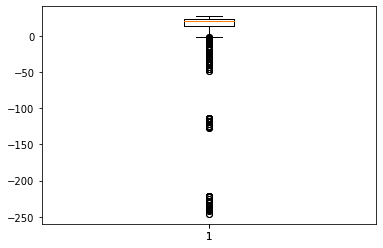

Posición de outliers en el extremo inferior:  [  2   3   4   6  12  17  19  20  23  24  25  26  27  30  31  32  33  34
  35  39  41  42  43  47  50  51  56  58  60  61  63  64  65  66  76  79
  99 102 122 145 168 171 224 225 226 227 228 499 501 502 503 603 604 609
 610 615 616 619 620 621 622 755 756 762 768 769 791 792 794 795 797 798
 813 814 820 823]
Posición de outliers en el extremo superior:  []
[0. 1.] [954  76]
Número de instancias normales:  954
Número de instancias atípicas:  76


In [183]:
#Tratamiento de outliers y valores perdidos (si los hay)

outlier_method = EllipticEnvelope().fit(X)
# Obtenemos unos valores de puntuación a nivel de instancia para determinar después las que corresponden con valores atípicos
scores_pred = outlier_method.decision_function(X)

Q1 = stats.scoreatpercentile(scores_pred, 25)
Q3 = stats.scoreatpercentile(scores_pred, 75)
RIC = Q3 - Q1
li = Q1 - 3*RIC #xmin
ls = Q3 + 3*RIC #xmax

print('limite inferior: ', li)
print('limite superior: ', ls)

prop = plt.boxplot(scores_pred)
plt.boxplot(scores_pred)
plt.show()

pos_i = np.where(scores_pred<li)
pos_s = np.where(scores_pred>ls)
print('Posición de outliers en el extremo inferior: ', pos_i[0])
print('Posición de outliers en el extremo superior: ', pos_s[0])

mask_outliers = np.zeros(np.shape(scores_pred))
mask_outliers[pos_i] = 1
mask_outliers[pos_s] = 1

valores, ocurrencias = np.unique(mask_outliers, return_counts=True)
print(valores, ocurrencias)
print('Número de instancias normales: ', ocurrencias[0])
print('Número de instancias atípicas: ', ocurrencias[1])

for i in range(len(pos_i[0])):
  X = np.delete(X,(i), axis = 0)
  y = np.delete(y,(i), axis = 0)

for i in range(len(pos_s[0])):
  X = np.delete(X,(i), axis = 0)
  y = np.delete(y,(i), axis = 0)

In [184]:
#Partición externa de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
valores_test, ocur_test = np.unique(y_test, return_counts=True)
print('Test: ', 'clases:', valores_test, ' ocurrencias: ', ocur_test)

Test:  clases: [ 3.32  6.47  6.94  7.32  7.4   7.68  7.72  8.37 10.54 10.79 11.41 11.47
 11.98 12.05 12.46 12.54 12.84 13.18 13.22 13.52 13.57 14.6  14.94 14.99
 15.09 16.11 16.28 16.89 17.22 17.24 17.95 17.96 18.03 18.13 19.42 19.77
 19.93 20.28 20.42 20.73 20.77 21.18 21.6  22.49 22.72 22.75 22.93 23.22
 23.7  23.74 24.4  24.5  24.54 24.89 24.92 25.08 25.18 25.22 25.62 25.72
 26.92 27.53 27.63 27.68 27.77 28.99 29.16 29.39 29.73 29.79 29.89 29.93
 29.98 30.28 30.65 30.96 31.25 31.27 31.38 31.54 31.72 31.81 31.87 31.88
 31.9  32.04 32.05 32.1  32.11 32.96 33.   33.06 33.08 33.42 33.76 33.8
 34.29 34.57 35.23 35.34 36.45 36.94 36.96 37.17 37.27 37.42 37.81 37.92
 37.96 38.2  38.46 38.56 38.89 39.   39.06 39.27 39.3  39.38 39.42 39.49
 39.58 39.94 40.66 40.76 41.2  41.3  41.54 42.22 43.06 43.39 44.28 45.3
 45.94 46.25 46.39 46.68 47.28 47.4  47.82 49.77 50.51 50.53 50.6  50.66
 51.02 51.04 51.06 51.33 51.73 51.96 52.2  52.3  52.43 52.83 53.39 53.72
 54.28 54.77 54.9  55.45 55.5  55.55 5

In [185]:
#Estandarización de los datos
estandarizador = StandardScaler()
estandarizador.fit(X_train)
X_train = estandarizador.transform(X_train)

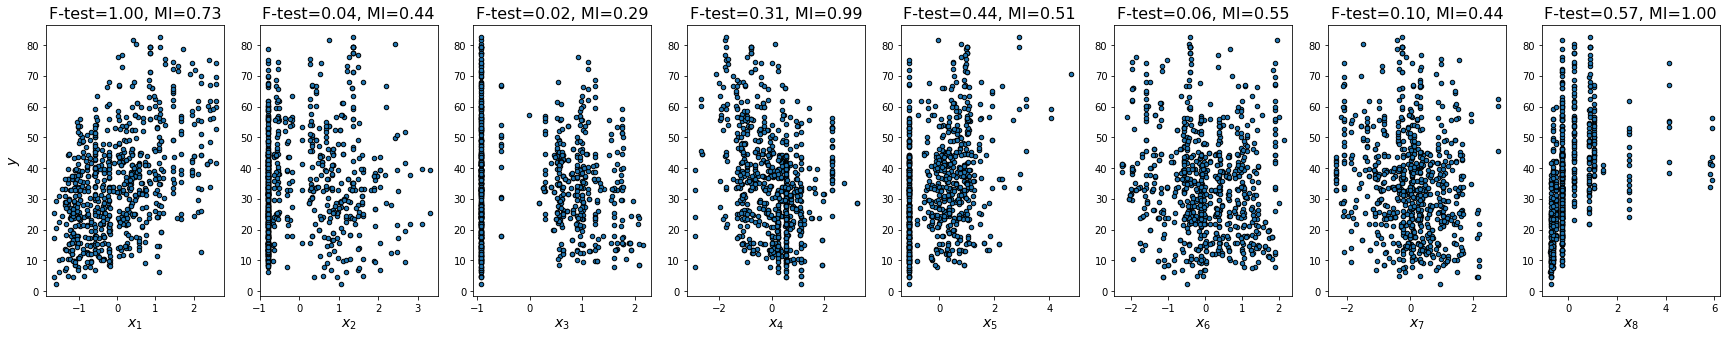

(763, 8)
(763, 7)


In [186]:
#Selección de atributos mediante métodos supervisados (solo uno)

f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train,y_train)
mi /= np.max(mi)

plt.figure(figsize=(30, 5))
for i in range(dataFrame.shape[1] -1):
    plt.subplot(1, dataFrame.shape[1] -1, i + 1)
    plt.scatter(X_train[:, i], y_train, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i],
              mi[i]), fontsize=16)
plt.show()

print(X_train.shape)

for i in range(len(f_test)):
  j=0
  if f_test[i] + mi[i] < 0.35:
    X_train = np.delete(X_train,(i-j), axis = 1)
    X_test = np.delete(X_test,(i-j), axis = 1)
    j+=1

print(X_train.shape)

In [187]:
#Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
valores_train, ocur_train = np.unique(y_train, return_counts=True)
print('Entrenamiento: ', ' clases:', valores_train, '  ocurrencias:', ocur_train)

valores_val, ocur_val = np.unique(y_val, return_counts=True)
print('Entrenamiento: ', ' clases:', valores_val, '  ocurrencias:', ocur_val)

Entrenamiento:   clases: [ 2.33  4.57  4.78  4.83  4.9   6.27  6.28  6.81  6.88  6.9   7.75  7.84
  8.    8.54  9.01  9.13  9.31  9.56  9.69  9.74  9.99 10.03 10.22 10.34
 10.35 10.38 10.39 10.54 10.73 10.76 11.39 11.47 11.48 11.58 11.65 11.96
 12.18 12.25 12.37 12.45 12.47 12.64 12.73 12.79 13.09 13.2  13.29 13.33
 13.36 13.4  13.46 13.52 13.54 13.62 13.71 13.82 14.14 14.2  14.4  14.5
 14.54 14.64 14.7  14.8  15.03 15.04 15.09 15.34 15.36 15.42 15.44 15.52
 15.53 15.57 15.58 15.62 15.75 15.82 15.87 16.5  16.88 17.17 17.2  17.24
 17.28 17.34 17.37 17.44 17.54 17.57 17.58 17.96 18.02 18.03 18.13 18.28
 18.29 18.42 18.91 19.01 19.11 19.35 19.52 19.54 19.69 19.77 19.99 20.08
 20.59 20.73 20.92 20.97 21.02 21.06 21.16 21.29 21.48 21.5  21.54 21.75
 21.78 21.82 21.86 21.91 21.92 21.95 22.14 22.32 22.35 22.44 22.5  22.53
 22.63 22.84 22.95 23.08 23.14 23.25 23.4  23.51 23.52 23.64 23.69 23.74
 23.79 23.8  23.84 23.85 24.   24.05 24.07 24.1  24.13 24.24 24.28 24.29
 24.34 24.39 24.43 24.44 24

In [188]:
#Modelado
n_neighbors=5
results=[]
best_result=[0,0]
best_n_neighbors=0
for i in range(X_train.shape[1]):
    n_neighbors=i+1
    KNN = KNeighborsRegressor(n_neighbors)
    results = cross_val_score(KNN, X_val, y_val, cv=KFold(n_splits=5, shuffle=True, random_state=42))
    if results.mean() > best_result[0]:
      best_result[0] = results.mean()
      best_result[1] = results.std()
      best_n_neighbors = i+1

print(' KNN :  Accuracy:  %0.4f +/- %0.4f with %i neighbors'% (best_result[0], best_result[1], best_n_neighbors))


 KNN :  Accuracy:  0.5680 +/- 0.0662 with 4 neighbors


In [198]:
#Predicción y evaluación sobre el conjunto de test (resultados cuantitativos y cualitativos)
OLS = LinearRegression()
KNN = KNeighborsRegressor(best_n_neighbors)

OLS_definitivo = OLS.fit(X_train, y_train)
ols_y_pred = OLS_definitivo.predict(X_test)

# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, ols_y_pred))
#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, ols_y_pred))
#MAPE
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, ols_y_pred))
#RMSE
print("Mean squeared error: %.2f" % mean_squared_error(y_test, ols_y_pred, squared=True))
# R2
print("Coefficient of determination: %.2f" % r2_score(y_test, ols_y_pred))

KNN_definitivo = KNN.fit(X_train, y_train)
knn_y_pred = KNN_definitivo.predict(X_test)

# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, knn_y_pred))
#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, knn_y_pred))
#MAPE
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, knn_y_pred))
#RMSE
print("Mean squeared error: %.2f" % mean_squared_error(y_test, knn_y_pred, squared=True))
# R2
print("Coefficient of determination: %.2f" % r2_score(y_test, knn_y_pred))

Mean squared error: 1621223.74
Mean absolute error: 1125.25
Mean absolute percentage error: 54.53
Mean squeared error: 1621223.74
Coefficient of determination: -6007.85
Mean squared error: 315.68
Mean absolute error: 14.24
Mean absolute percentage error: 0.47
Mean squeared error: 315.68
Coefficient of determination: -0.17
